## Week2. Optimization problems & Rydberg atom arrays - Task 3 (classical)

-----

Solve Gotham City's problem classically.

Starting from the imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Week2_Rydberg_Atoms.draw_graph import draw_graph
from Week2_Rydberg_Atoms.utils import sanity_check
from abstract_udmis import AbstractUDMIS

%matplotlib inline


Below is the code to solve the UD-MIS problem given in the Task 1.

In [2]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
        return edges
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):
                
                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]
                
            vertex_term += self.occupations[i]
        
        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)        


The graph to be dealt with in Task 3 is as follows.

In [3]:
u = 1.35
graph = [
    (1.19, 4.25),
    (2.71, 3.48),
    (1.19, 3.51),
    (2.00, 3.38),
    (1.12, 2.86),
    (1.70, 2.42),
    (2.36, 2.54),
    (1.52, 1.48),
    (2.15, 1.54),
    (2.14, 1.87),
    (1.72, 0.86),
    (2.29, 0.87),
]

udmis = UDMIS(u, graph)



12


We use the annealing schedule function used in Task1.

In [4]:
def Task1_graph(N, val):
    t = np.arange(N+1)
    T_i = 100
    T_f = 0.01
    T = T_i * ((T_f/T_i) ** ((t/N) ** val))
    y1 = list(range(int(N/10)+1))
    S = list(range(int(N/10)+1))

    for t in range(N+1):
        temp = T[t]
        E = udmis.mc_step(T=temp)

        if t % 10 == 0:
            # print(t, E, udmis.occupations)
            num_violated, num_vertices = sanity_check(graph, answer=udmis.occupations, radius=0.5)
            k = int(t/10)
            y1[k] = E
            if num_violated != 0 or num_vertices != 5:
                S[k] = 0
            else:
                S[k] = 1

        if t == N:
            UO = udmis.occupations

    x1 = range(int(N/10)+1)
    plt.plot(x1, y1, 'red')
    plt.scatter(x1, S, s=1, c='b')
    plt.show()

    g = draw_graph(coordinates=graph,
                   radius=0.5,
                   answer=UO)

We take take step size 1000 and investigate the case where $p = 1, \frac{1}{5}, \frac{1}{25}$.

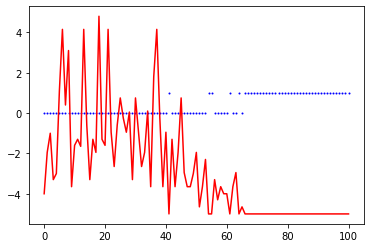

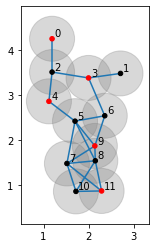

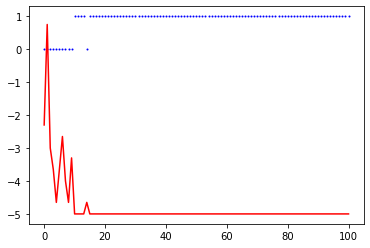

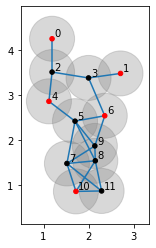

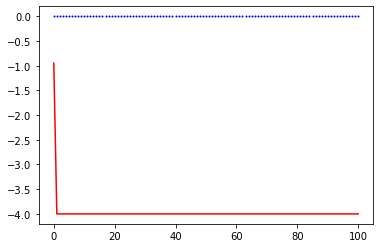

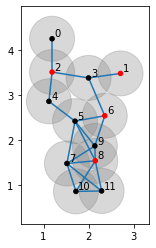

In [5]:
Task1_graph(1000, 1)
Task1_graph(1000, 1/5)
Task1_graph(1000, 1/25)